## COMP 3400

Fall Project

Name: Yuvraj Kalsi

Student number: 202054136

## Wine Dataset 

Importing all the necessary libraries

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Load Wine Dataset from our wine-data-set.csv file

In [2]:
df = pd.read_csv('wine-data-set.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


See the data how out data looks like

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Statistical information about the dataset

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


datatypes information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463 entries, 0 to 6462
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  quality               6463 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 606.0 KB


Check if there are any null values

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Coorelation matrix for our data

<Axes: >

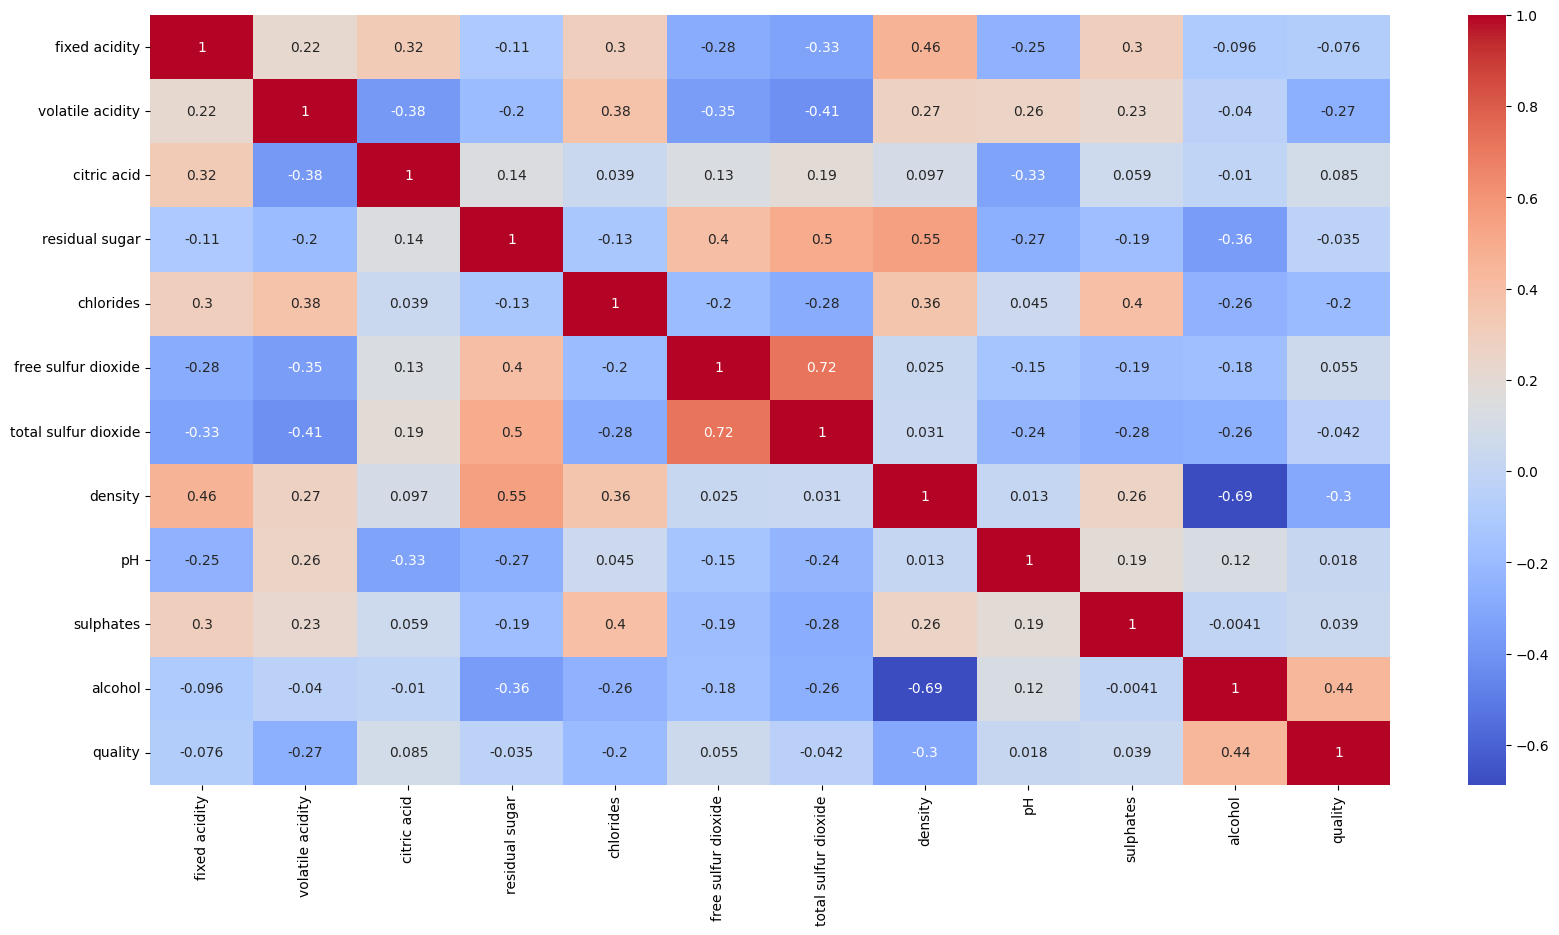

In [7]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Construct an classify function which will do basic training with test size 25%, it will also train the data and return the accuracy

In [8]:
# classify function: This function provides a quick overview of the model's performance on a held-out test set and its generalization ability through cross-validation.

def classify(X, y):
    model = LogisticRegression()
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    Accuracy = model.score(x_test, y_test)
    print("Accuracy:", Accuracy * 100)
    return Accuracy

Lets first create the bottom line model withour any changes to our data and record the accuracies in Accuracy_list array

In [9]:
# We will define features and target value, in this case features are the first 11 columns and target is last one which is quality
# We will name the model and accuracy as bottom-line model and bottom-line accuracy
X = df.drop('quality', axis=1)
y = df['quality']
Accuracy_list = []  # List to store all the accuarcies.
print("Bottom line model accuracy is as below:")
bottom_line_accuracy = classify(X, y)
Accuracy_list.append(["bottom_line_accuracy",bottom_line_accuracy])

Bottom line model accuracy is as below:
Accuracy: 45.73019801980198


## Perform the Data transformation on predictors and then perform logistic regression

Min Max Scaler transformation

In [10]:
# In this we will use MinMax transformation for citric acid column
from sklearn.preprocessing import MinMaxScaler

# We will extract the 'citric acid' column for MinMax scaling
citric_acid_column = df[['citric acid']]
scaler = MinMaxScaler()
citric_acid_scaled = scaler.fit_transform(citric_acid_column)

# Replace the original 'citric acid' column with the scaled values
X = df.drop('quality', axis=1)
y = df['quality']
X['citric acid'] = citric_acid_scaled
print("Model with MinMax Scaling accuracy is as below:")
minMax_accuracy_citric_acid_drop = classify(X, y)
Accuracy_list.append(["minMax_accuracy_citric_acid ",minMax_accuracy_citric_acid_drop])

Model with MinMax Scaling accuracy is as below:
Accuracy: 44.74009900990099


In [11]:

# We will extract the 'residual sugar' column for MinMax scaling
residual_sugar_column = df[['residual sugar']]
scaler = MinMaxScaler()
residual_sugar_scaled = scaler.fit_transform(residual_sugar_column)

# Replace the original 'residual sugar' column with the scaled values
X = df.drop('quality', axis=1)
y = df['quality']
X['residual sugar'] = residual_sugar_scaled
print("Model with MinMax Scaling accuracy is as below:")
minMax_accuracy_residual_sugar_drop = classify( X, y)
Accuracy_list.append(["minMax_accuracy_residual_sugar ",minMax_accuracy_residual_sugar_drop])

Model with MinMax Scaling accuracy is as below:
Accuracy: 46.72029702970298


Robust Scaling

In [12]:
from sklearn.preprocessing import RobustScaler
# In this we will use Robust scaling transformation for chlorides column
# We will extract the 'chlorides' column for RobustScaler
chlorides_column = df[['chlorides']]
scaler = RobustScaler()
chlorides_scaled = scaler.fit_transform(chlorides_column)

# Replace the original 'chlorides' column with the scaled values
X = df.drop('quality', axis=1)
y = df['quality']
X['chlorides'] = chlorides_scaled
print("Model with RobustScaler accuracy is as below:")
RobustScaler_accuracy = classify( X, y)
Accuracy_list.append(["RobustScaler_accuracy ",RobustScaler_accuracy])

Model with RobustScaler accuracy is as below:
Accuracy: 45.915841584158414


Standard Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
# In this we will use standard scaling transformation for residual sugar column
# We will extract the 'residual sugar' column for Standard Scaler
residual_sugar_column = df[['residual sugar']]
scaler = StandardScaler()
residual_sugar_scaled = scaler.fit_transform(residual_sugar_column)

# Replace the original 'residual sugar' column with the scaled values
X = df.drop('quality', axis=1)
y = df['quality']
X['residual sugar'] = residual_sugar_scaled
print("Model with Standard Scaler accuracy is as below:")
Standard_scalar_accuracy = classify( X, y)
Accuracy_list.append(["Standard_scalar_accuracy ",Standard_scalar_accuracy])

Model with Standard Scaler accuracy is as below:
Accuracy: 45.66831683168317


MaxAbsScaler Scaling

In [14]:
from sklearn.preprocessing import MaxAbsScaler
# In this we will use MaxAbsScaler scaling transformation for density column
# We will extract the 'density' column for Standard Scaler
density_column = df[['density']]
scaler = MaxAbsScaler()
density_scaled = scaler.fit_transform(density_column)

# Replace the original 'density' column with the scaled values
X = df.drop('quality', axis=1)
y = df['quality']
X['density'] = density_scaled
print("Model with MaxAbsScaler accuracy is as below:")
MaxAbsScaler_accuracy = classify( X, y)
Accuracy_list.append(["MaxAbsScaler_accuracy ",MaxAbsScaler_accuracy])

Model with MaxAbsScaler accuracy is as below:
Accuracy: 44.98762376237624


## Perform the feature selection on predictors and then perform logistic regression

Here we will keep (pH sulphates alcohol) columns and drop the rest

In [15]:
X = df.drop('quality', axis=1)
y = df['quality']
X = X.drop(df.columns[[0,1,2,3,4,5,6,7]], axis=1)
print("Model with selected features (pH sulphates alcohol) is as below:")
bottom_line_feature_selection_1_accuracy = classify( X, y)
Accuracy_list.append(["bottom_line_feature_selection_1_accuracy ",bottom_line_feature_selection_1_accuracy])

Model with selected features (pH sulphates alcohol) is as below:
Accuracy: 50.61881188118812


Here we will keep (sulphates alcohol) columns and drop the rest

In [16]:
X = df.drop('quality', axis=1)
y = df['quality']
X = X.drop(df.columns[[0,1,2,3,4,5,6,7,8]], axis=1)
print("Model with selected features (sulphates alcohol) is as below:")
bottom_line_feature_selection_2_accuracy = classify( X, y)
Accuracy_list.append(["bottom_line_feature_selection_2_accuracy ",bottom_line_feature_selection_2_accuracy])

Model with selected features (sulphates alcohol) is as below:
Accuracy: 51.73267326732673


Here we will keep (fixed acidity volatile acidity citric acid) columns and drop the rest

In [17]:
X = df.drop('quality', axis=1)
y = df['quality']
X = X.drop(df.columns[[3,4,5,6,7,8,9,10]], axis=1)
print("Model with selected features (fixed acidity volatile acidity citric acid) is as below:")
bottom_line_feature_selection_3_accuracy = classify( X, y)
Accuracy_list.append(["bottom_line_feature_selection_3_accuracy ",bottom_line_feature_selection_3_accuracy])

Model with selected features (fixed acidity volatile acidity citric acid) is as below:
Accuracy: 45.915841584158414


Here we will keep (volatile acidity citric acid) columns and drop the rest

In [18]:
X = df.drop('quality', axis=1)
y = df['quality']
X = X.drop(df.columns[[0,3,4,5,6,7,8,9,10]], axis=1)
print("Model with selected features (volatile acidity citric acid) is as below:")
bottom_line_feature_selection_4_accuracy = classify( X, y)
Accuracy_list.append(["bottom_line_feature_selection_4_accuracy ",bottom_line_feature_selection_4_accuracy])

Model with selected features (volatile acidity citric acid) is as below:
Accuracy: 45.97772277227723


Here we will keep (chlorides free sulfur dioxide sulphates) columns and drop the rest

In [19]:
X = df.drop('quality', axis=1)
y = df['quality']
X = X.drop(df.columns[[0,3,1,2,6,7,8,10]], axis=1)
print("Model with selected features (chlorides free sulfur dioxide sulphates) is as below:")
bottom_line_feature_selection_5_accuracy = classify( X, y)
Accuracy_list.append(["bottom_line_feature_selection_5_accuracy ",bottom_line_feature_selection_5_accuracy])

Model with selected features (chlorides free sulfur dioxide sulphates) is as below:
Accuracy: 42.45049504950495


## Here is the output of all the accuracies which is printed and shown in a bar graph

In [20]:
# Prining all the techniques applies and their accuracies
for i in Accuracy_list:
    # print(i[0] + ":  "  + "%.4f" % i[1])
    # print("{:<10}: {:.4f}".format(i[0], i[1]))
    print("{:<{}}: {:.4f}".format(i[0], 50, i[1]))

bottom_line_accuracy                              : 0.4573
minMax_accuracy_citric_acid                       : 0.4474
minMax_accuracy_residual_sugar                    : 0.4672
RobustScaler_accuracy                             : 0.4592
Standard_scalar_accuracy                          : 0.4567
MaxAbsScaler_accuracy                             : 0.4499
bottom_line_feature_selection_1_accuracy          : 0.5062
bottom_line_feature_selection_2_accuracy          : 0.5173
bottom_line_feature_selection_3_accuracy          : 0.4592
bottom_line_feature_selection_4_accuracy          : 0.4598
bottom_line_feature_selection_5_accuracy          : 0.4245


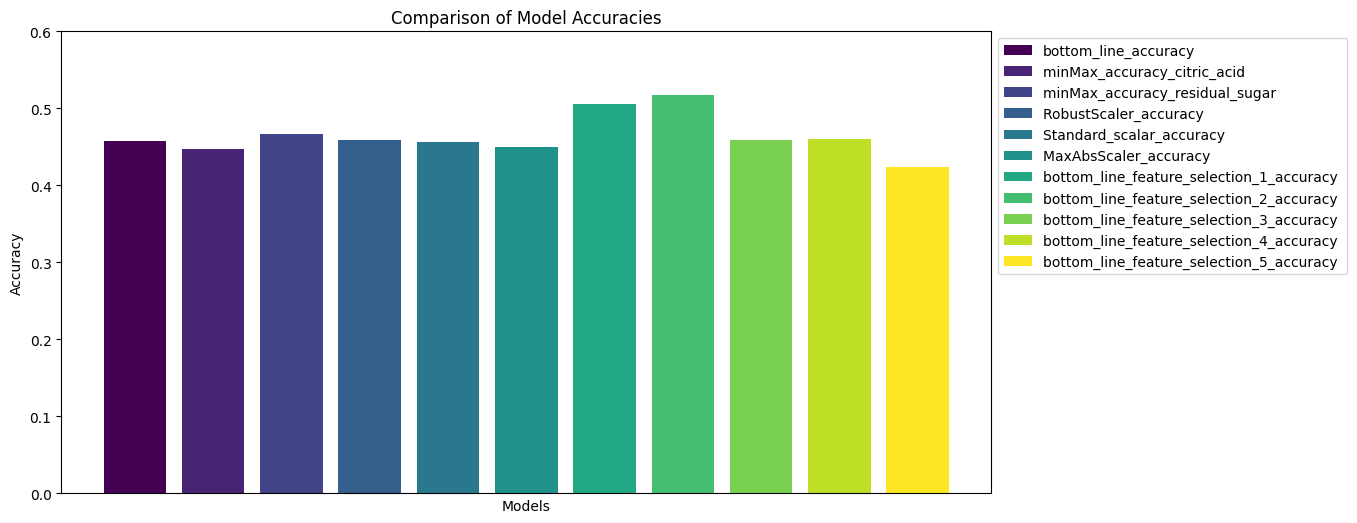

In [21]:
# Plotting the bar graph
model_names = []
accuracies_list = []
for i in Accuracy_list:
    model_names.append(i[0])
    accuracies_list.append(i[1])

colors = plt.cm.viridis(np.linspace(0, 1, len(model_names))) # choosing different color for each bar

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, accuracies_list, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 0.6)  # Set the y-axis range from 0 to 1 for accuracy values
plt.xticks([]) # It removes the model names from X-axis becuase they were overlapping and could not read anything

# Adding a legend
plt.legend(bars, model_names, loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In this notebook, we calculated various accuracies by applying many data preparation techniques such as data transformations and feature selection. We have used the Logistic regression for prediction performance and will be using the "quality" variable as the target and the remaining 11 as non-target. The bottom line accuracy which is accuracy without any changes to the dataset is 0.4573.

We have used minMax scaling twice, and Robust scaling, standard scaling, and maxAbsScaling. The accuracy of the model ranged between 0.4474 to 0.4672, we can see in the above chart that min-max scaling transformation with citric acid has been able to secure the highest accuracy of 0.4672, which tells us this transformation has marginally impacted the predictive performance of our logistic regression model.

Then we performed feature selection by dropping subsets of predictors. The accuracy of the model then ranged from 0.4245 to 0.5173. bottom_line_feature_selection_2_accuracy has achieved the highest accuracy than all other methods and it is higher than our bottom-line accuracy. In bottom_line_feature_selection_2, I only kept 2 columns (sulphur and alcohol) and dropped the rest, which explains to us that some subsets which have more correlation with quality in this dataset can enhance the model's performance. However, I would like to point out that not all feature selection processes led to improvements, as seen in 'bottom_line_feature_selection_5' with an accuracy of 0.4245. In bottom_line_feature_selection_5_accuracy I kept (chlorides, free sulfur dioxide, and sulphates) and dropped the rest.

We can notice in our correlation matrix that alcohol has the highest effect on the quality, In the model where we used alcohol as a predictive measure had better performance than others. While some predictor transformations showed minor improvements, the variations were relatively subtle compared to the broader range of impacts observed through feature selection.

In conclusion, We performed different data preparation techniques to investigate the performance of the classification model. Feature selection specifically has shown a more substantial influence on accuracy as compared to data transformation when used with logistic regression applied to the wine data set. The selection of appropriate targets and non-targets is important for optimizing model accuracy.